# Part 3. Sentiment Analysis on Twitter Data from 2020 US Presidential Election

### Sentiment Analysis Methods

#### 1) Rule Based
    1) Text Blob
    2) Vader Sentiment Analysis

#### 2) Machine Learning
    1) Logistic Regression
    2) SVM

Reference: https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4


In [1]:
# install basic packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
# Load data into dataframe
pd.set_option('display.max_colwidth', 50)
df = pd.read_csv('2020-08_clean.csv')

df.head()


,created_at,id,full_text,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,user,retweeted_status,retweet_count,retweeted,day,month
0,2020-08-12 23:59:54+00:00,1293698760506318850,"RT @RealJamesWoods: This is our last stand, fo...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,"{'id': 276115813, 'id_str': '276115813', 'name...",{'created_at': 'Wed Aug 12 23:57:19 +0000 2020...,69511,False,12,8
1,2020-08-12 23:59:54+00:00,1293698760615354369,"@JoeBiden @KamalaHarris Water, air, have neve...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.293658e+18,1.293658e+18,939091.0,939091.0,"{'id': 1010207287284203520, 'id_str': '1010207...",NaN,0,False,12,8
2,2020-08-12 23:59:54+00:00,1293698760619569153,RT @realDonaldTrump: Good news for Florida! I’...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,NaN,"{'id': 239098890, 'id_str': '239098890', 'name...",{'created_at': 'Wed Aug 12 18:44:01 +0000 2020...,9160,False,12,8
3,2020-08-12 23:59:54+00:00,1293698760627937281,@realDonaldTrump @KamalaHarris You are so fuck...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.293511e+18,1.293511e+18,25073877.0,25073877.0,"{'id': 14420417, 'id_str': '14420417', 'name':...",NaN,0,False,12,8
4,2020-08-12 23:59:54+00:00,1293698760703320064,RT @Navy_Lady_45: Comcast has banned Laura Loo...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,"{'id': 435525229, 'id_str': '435525229', 'name...",{'created_at': 'Tue Aug 11 12:33:05 +0000 2020...,395,False,12,8


In [3]:
df.shape

(157359, 15)

### Seperate tweets by:

    1) Tweets from Original Content
    2) Retweeted tweets
    3) Reply Tweets

In [4]:
# get user info
original_location = []
original_followers_count = []
retweet = []
followers_count = []

# number of followers for user who retweeted
for i in np.arange(0, len(df), 1):
    followers_count.append(eval(df['user'][i])['followers_count'])
    
for i in np.arange(0, len(df), 1):
    original_location.append(eval(df['user'][i])['location'])
    
df['original_location'] = original_location
df['followers_count'] = followers_count

In [268]:
#map(lambda x : eval(df['retweeted_status'][x])['full_text'], [0, 2] if df['retweeted_status'].notna()[x] == True else x)

r = np.arange(0, len(df), 1)

def map_functions(index):
    """ map an iterable of functions on the the object x """
    retweet =  []
    
    for x in index:
        
        if df['retweeted_status'].notna()[x] == True:
            retweet.append(eval(df['retweeted_status'][x])['full_text'])
        elif df['retweeted_status'].notna()[x] == False:
            retweet.append(np.nan)
        
    return retweet

retweet = map_functions(r)


In [285]:
dfretweet = pd.DataFrame(retweet, columns=['full_text'])
dfretweet.dropna(inplace = True)

In [317]:
# Replace full_text where there is a retweet with the reweet extracted from the df['retweeted_status']
# so that there is one column that contains the full text

for i in np.arange(0, len(df), 1):
    
    if df['retweeted_status'].notna()[i] == True:
    
        df['full_text'][i] = dfretweet['full_text'][i]

    else:
        pass

<ipython-input-317-887d8988419d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'][i] = dfretweet['full_text'][i]


In [74]:
#eval(df_retweeted['user'][0])['followers_count']
# number of followers from who it waas retweeted from
#for i in np.arange(0, len(df_retweeted), 1):
  #  original_followers_count.append(eval(df['retweeted_status'][i])['user']['followers_count'])

# lambda arguments : expression
#x = lambda a : a + 10
#print(x(5))

#map(lambda x, retweet.append(eval(df['retweeted_status'][x])['full_text']), np.arange(0, len(df), 1))  
## for i in np.arange(0, len(df), 1):
    #if df['retweeted_status'].isna().iloc[i] == False:
     #   retweet.append(eval(df['retweeted_status'][i])['full_text'])
    

# set df_retweeted['full_text'] to retweet in order to have entire tweet
#df_retweeted['full_text'] = retweet
#df_retweeted['']
#df['followers_count'] = followers_count
#df['original_followers_count'] =  original_followers_count
#df['original_user_location'] = user_loctaion

SyntaxError: invalid syntax (<ipython-input-74-4cdcc5cf698e>, line 15)

In [318]:
df.head()

,created_at,id,full_text,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,user,retweeted_status,retweet_count,retweeted,day,month,original_location,followers_count
0,2020-08-12 23:59:54+00:00,1293698760506318850,"This is our last stand, folks. And here’s your...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,"{'id': 276115813, 'id_str': '276115813', 'name...",{'created_at': 'Wed Aug 12 23:57:19 +0000 2020...,69511,False,12,8,"Saraland, AL",973
1,2020-08-12 23:59:54+00:00,1293698760615354369,"@JoeBiden @KamalaHarris Water, air, have neve...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.293658e+18,1.293658e+18,939091.0,939091.0,"{'id': 1010207287284203520, 'id_str': '1010207...",NaN,0,False,12,8,"Minnesota, USA",335
2,2020-08-12 23:59:54+00:00,1293698760619569153,Good news for Florida! I’m awarding $27.8M fro...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,NaN,"{'id': 239098890, 'id_str': '239098890', 'name...",{'created_at': 'Wed Aug 12 18:44:01 +0000 2020...,9160,False,12,8,,1033
3,2020-08-12 23:59:54+00:00,1293698760627937281,@realDonaldTrump @KamalaHarris You are so fuck...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.293511e+18,1.293511e+18,25073877.0,25073877.0,"{'id': 14420417, 'id_str': '14420417', 'name':...",NaN,0,False,12,8,"New York, USA",2851
4,2020-08-12 23:59:54+00:00,1293698760703320064,Comcast has banned Laura Loomer.\n\nPresident ...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,"{'id': 435525229, 'id_str': '435525229', 'name...",{'created_at': 'Tue Aug 11 12:33:05 +0000 2020...,395,False,12,8,,3750


In [319]:
# 1) ORIGINAL CONTENT
df_original_content = df[df['retweeted_status'].isna()].reset_index().drop('index', axis = 1)
df_original_content = df_original_content[df_original_content['in_reply_to_status_id'].isna()].reset_index().drop('index', axis = 1)

# 2) RETWEETS
df_retweeted = df[df['retweeted_status'].notna()].reset_index().drop('index', axis = 1)

# 3) REPLYS, will not include replies in analysis
#df_reply = df[df['in_reply_to_status_id'].notna()].reset_index().drop('index', axis = 1)


In [320]:
# View dataframe size
print('tweets with original content', df_original_content.shape)
print('tweets that are retweeted', df_retweeted.shape)
print('tweets that are replies', df_reply.shape)

tweets with original content (10061, 17)
tweets that are retweeted (107791, 17)
tweets that are replies (39507, 17)


The 'full_text' column for retweets are cut off. However, I am able to retrieve the original full text from the column 'retweeted_status'. I will collect the original tweet and replace the column 'full_text' with this text

# Step 1: Text pre-processing

Before running sentiment analysis, we need to first clean the tweet text data. Cleaning includes: 

1. Remove punctuation
2. Remove html links
3. Remov excess spaces
4. Remov RT @
5. Making all letters lowercase
6. newline after a break
7. newline after a par


## 1)  Text Blob

The textblob.sentiments module contains two sentiment analysis implementations, PatternAnalyzer (based on the pattern library) and NaiveBayesAnalyzer (an NLTK classifier trained on a movie reviews corpus).

The default implementation is PatternAnalyzer, but you can override the analyzer by passing another implementation into a TextBlob’s constructor.

For instance, the NaiveBayesAnalyzer returns its result as a namedtuple of the form: Sentiment(classification, p_pos, p_neg).



Text Blob is a text processing package that works with part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

Features
- Noun phrase extraction
- Part-of-speech tagging
- Sentiment analysis
- Classification (Naive Bayes, Decision Tree)
- Tokenization (splitting text into words and sentences)
- Word and phrase frequencies
- Parsing
- n-grams
- Word inflection (pluralization and singularization) and lemmatization
- Spelling correction
- Add new models or languages through extensions
- WordNet integration

#### The sentiment property returns the Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [321]:
# Import libraries

from textblob import TextBlob

### 1) Apply TextBlob Sentiment analysis without cleaning the data

In [322]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df_original_content['Subjectivity'] = df_original_content['full_text'].apply(getSubjectivity)
df_original_content['Polarity'] = df_original_content['full_text'].apply(getPolarity)

# Create two new columns 'Subjectivity' & 'Polarity'
df_retweeted['Subjectivity'] = df_retweeted['full_text'].apply(getSubjectivity)
df_retweeted['Polarity'] = df_retweeted['full_text'].apply(getPolarity)

# Will not include replies
# Create two new columns 'Subjectivity' & 'Polarity'
#df_reply['Subjectivity'] = df_reply['full_text'].apply(getSubjectivity)
#df_reply['Polarity'] = df_reply['full_text'].apply(getPolarity)



In [323]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [324]:
df_original_content['Analysis'] = df_original_content['Polarity'].apply(getAnalysis)
df_retweeted['Analysis'] = df_retweeted['Polarity'].apply(getAnalysis)
#df_reply['Analysis'] = df_reply['Polarity'].apply(getAnalysis)

pd.set_option('display.max_colwidth', None)
df_original_content[['full_text', 'Subjectivity', 'Polarity', 'Analysis']].head(10)

,full_text,Subjectivity,Polarity,Analysis
0,"@realDonaldTrump - I know that you’re gonna say “Fake News” “I Never said that” because you’re too dumb to realize that when you “Speak” people either “RECORD YOU” or “VIDEO YOU” but anywho, Q: did you mean what you said about writing EO’s shows weakness?\n\nhttps://t.co/pZDMp6waHF",0.729167,-0.395833,Negative
1,Agree! But we all know that the DEMS are going to use mail in ballots to cheat!!! There will be mutiple lawsuits filed we will NEVER get out of this mess unless MAIL IN BALLOTS are defeated first!#VOTER FRAUD IS REAL https://t.co/b6c3Uyj9OO,0.237500,0.012500,Positive
2,"WHY blame the Chicoms, when she can rack-up a few thousand more votes from willfully ignorant Trump haters convinced he's the real culprit. https://t.co/tRLVBxzXNC",0.300000,0.166667,Positive
3,"Top story: @JoeBiden: 'Let's get to work, @KamalaHarris. ' https://t.co/9GbtrFTAAB, see more https://t.co/pHBBHwSnl5",0.500000,0.500000,Positive
4,"Top story: @JoeBiden: 'Let's get to work, @KamalaHarris. ' https://t.co/S3Bjj6aULg, see more https://t.co/lXcLBuSdLo",0.500000,0.500000,Positive
5,@CaBrena_Realtor @paleblueeyes24 @CaracciGmc @TWIT_ANTHONY @realDonaldTrump Stupid Russians.,1.000000,-0.800000,Negative
6,"Top story: The White House: ""LIVE: President @realDonaldTrump holds a news conference"" https://t.co/moQNCzY27x, see more https://t.co/48FYIGUx2a",0.375000,0.284091,Positive
7,VP @JoeBiden please talk about how you will protect Social Security during #DNC2020. This is a top issue for voters 50+. Social Security is a hard-earned benefit and a promise that must be kept. #ProtectVoters50Plus,0.211111,0.188889,Positive
8,"Watch; Biden keeps F'ing up Kamala name.\nWhy did the top 1% thing he was the best?\nO, that's right, all the new tax brakes that they will get and the working class will have to pay for in not just with their money but with some of their lives to as Med4All will not be passed. https://t.co/mwVEnBupGd",0.447565,0.480519,Positive
9,Cannot believe that there are idiots out there who'd still vote for this joke of a human being and dad. #sleazytrump #VoteBidenHarris2020 https://t.co/3PNVQ0k5RE,0.450000,-0.400000,Negative


In [325]:
### View subjectivity, Polarity, Sentiment, and Text for first tweet

print(df_original_content['full_text'].iloc[0])
print('')
print('Subjectivity: ', df_original_content['Subjectivity'].iloc[0])
print('Polarity: ', df_original_content['Polarity'].iloc[0])
print('Sentiment: ', df_original_content['Analysis'].iloc[0])


@realDonaldTrump - I know that you’re gonna say “Fake News” “I Never said that” because you’re too dumb to realize that when you “Speak” people either “RECORD YOU” or “VIDEO YOU” but anywho, Q: did you mean what you said about writing EO’s shows weakness?

https://t.co/pZDMp6waHF

Subjectivity:  0.7291666666666666
Polarity:  -0.3958333333333333
Sentiment:  Negative


Looking at the above tweet, I would agree that the sentiment is Negative

In [24]:
#df_unclean = df_original_content.append(df_retweeted).reset_index().drop('index', axis = 1)
#df_unclean = df_unclean.append(df_reply).reset_index().drop('index', axis = 1)

### 2) Clean Text and then apply TextBlob Sentiment Analysis

Create new dataframes for cleaning dataa

In [329]:
# 1) ORIGINAL CONTENT
df_original_clean = df[df['retweeted_status'].isna()].reset_index().drop('index', axis = 1)
df_original_clean = df_original_clean[df_original_clean['in_reply_to_status_id'].isna()].reset_index().drop('index', axis = 1)

# 2) RETWEETS
df_retweeted_clean = df[df['retweeted_status'].notna()].reset_index().drop('index', axis = 1)




In [331]:
# Remove punctation and Emojies

# Create a function to clean text
def cleanTxt(text):

    text = re.sub('RT[\s]@[A-Za-z0–9]+', '', text) # Removing RT and the the account retweeted from
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text = re.sub('https', '', text)
    text = re.sub(r'[^\w\s]', '', text) # removes punctuation and emojis
    text = re.sub(r'\s+', ' ', text)  # replace consecutive spaces
    text = re.sub(r'\s*<br\s*/?>\s*', '\n', text)  # newline after a <br>
    text = re.sub(r'^\s+', '', text)  # remove spaces at the beginning
    text = re.sub(r'\s+$', '', text)  # remove spaces at the end
    
    text = text.lower()
    
        
    return text

In [332]:
# Clean Original Tweets
text = df_original_clean['full_text'].apply(cleanTxt)
df_original_clean['full_text'] = text

# Clean Retweets
text = df_retweeted_clean['full_text'].apply(cleanTxt)
df_retweeted_clean['full_text'] = text


In [333]:
# Add subjectivity & polarity to original tweet dataframe
df_original_clean['Subjectivity'] = df_original_clean['full_text'].apply(getSubjectivity)
df_original_clean['Polarity'] = df_original_clean['full_text'].apply(getPolarity)
df_original_clean['Analysis'] = df_original_clean['Polarity'].apply(getAnalysis)

# Add subjectivity & polarity to retweets dataframe
df_retweeted_clean['Subjectivity'] = df_retweeted_clean['full_text'].apply(getSubjectivity)
df_retweeted_clean['Polarity'] = df_retweeted_clean['full_text'].apply(getPolarity)
df_retweeted_clean['Analysis'] = df_retweeted_clean['Polarity'].apply(getAnalysis)

In [334]:
# Show the dataframe for original tweets

pd.set_option('display.max_colwidth', None)
df_original_clean[['full_text', 'Subjectivity', 'Polarity','Analysis']].head(5)

,full_text,Subjectivity,Polarity,Analysis
0,realdonaldtrump i know that youre gonna say fake news i never said that because youre too dumb to realize that when you speak people either record you or video you but anywho q did you mean what you said about writing eos shows weakness,0.729167,-0.395833,Negative
1,agree but we all know that the dems are going to use mail in ballots to cheat there will be mutiple lawsuits filed we will never get out of this mess unless mail in ballots are defeated firstvoter fraud is real,0.237500,0.012500,Positive
2,why blame the chicoms when she can rackup a few thousand more votes from willfully ignorant trump haters convinced hes the real culprit,0.300000,0.166667,Positive
3,top story joebiden lets get to work kamalaharris see more,0.500000,0.500000,Positive
4,top story joebiden lets get to work kamalaharris see more,0.500000,0.500000,Positive


In [335]:
print(df_original_clean['full_text'].loc[0])
print('')
print('Subjectivity: ', df_original_clean['Subjectivity'].loc[0])
print('Polarity: ', df_original_clean['Polarity'].loc[0])
print('Sentiment: ', df_original_clean['Analysis'].loc[0])


realdonaldtrump i know that youre gonna say fake news i never said that because youre too dumb to realize that when you speak people either record you or video you but anywho q did you mean what you said about writing eos shows weakness

Subjectivity:  0.7291666666666666
Polarity:  -0.3958333333333333
Sentiment:  Negative


For the first tweet in df_original, the polarity, subjectiy, and sentiment between the clean and uncleaned version did not change. To really see how much has changed after cleaning the data, I will calculate how many tweets out of the total tweets have changed polarity after cleaning.

In [31]:
#df_clean = df_original_clean.append(df_retweeted_clean).reset_index().drop('index', axis = 1)
#df_clean = df_clean.append(df_reply_clean).reset_index().drop('index', axis = 1)

In [336]:
# Checking polarity difference for unclean and clean text for original content tweets
diff_polarity = df_original_content['Polarity'] - df_original_clean['Polarity']
polarity_diff = pd.DataFrame(diff_polarity)
polarity_diff = polarity_diff.sort_values(by=['Polarity'], ascending = False)

polarity_diff

,Polarity
1164,1.000000
9920,0.800000
3764,0.714286
1206,0.714286
8626,0.700000
...,...
6588,-0.700000
4593,-0.800000
2743,-0.800000
10019,-0.800000


In [337]:
# Identify how many tweets have changed and how many tweets have not changed after cleaning text

polarity_diff['group'] = 0
# Find all polarity scores that have changed signifcantly with cleaning text and have not changed significantly with cleaning text
for i in np.arange(0, len(polarity_diff), 1):
    if polarity_diff['Polarity'][i] > 0:

        polarity_diff['group'][i] = 'Changed'
        
    elif polarity_diff['Polarity'][i] < -0:

        polarity_diff['group'][i] = 'Changed'
        
    else:
        polarity_diff['group'][i] = 'No Change'

<ipython-input-337-93745dd4d61f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polarity_diff['group'][i] = 'No Change'
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-337-93745dd4d61f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polarity_diff['group'][i] = 'Changed'
<ipython-input-337-93745dd4d61f>:12

In [338]:
diff = polarity_diff.groupby(polarity_diff['group']).count().reset_index()

diff


,group,Polarity
0,Changed,1408
1,No Change,8653


In [339]:
print(int(diff['Polarity'][0]/(diff['Polarity'][0]+diff['Polarity'][1])*100), 'percent of polarity changed after cleaning')

13 percent of polarity changed after cleaning


Text(0.5, 1.0, 'Compare how many tweets changed polarity after applying text cleaning')

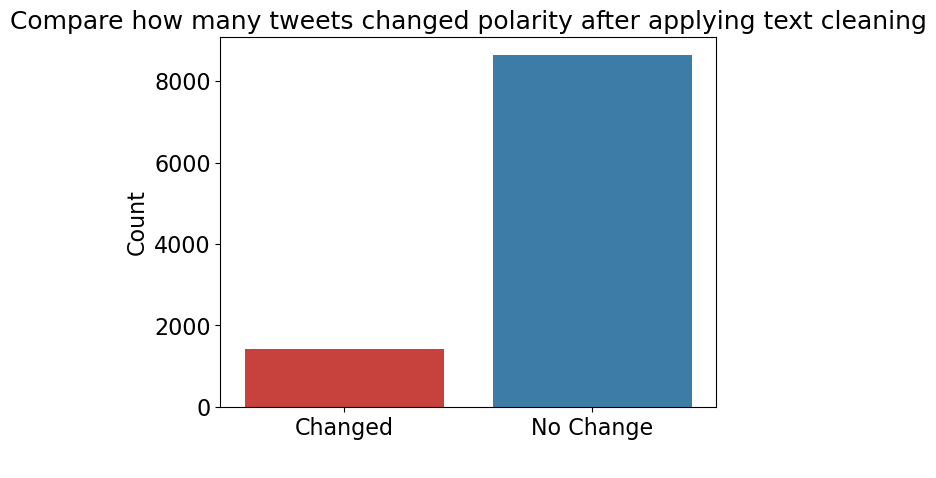

In [340]:
import seaborn as sns

colors = ["#de2d26", "#2c7fb8"]
sns.set_palette(sns.color_palette(colors))
sns.color_palette("Paired")
ax = sns.barplot(x="group", y="Polarity", data=diff)
ax.set_xlabel(" ",fontsize=16)
ax.set_ylabel("Count",fontsize=16)
ax.tick_params(labelsize=16)
ax.axes.set_title("Compare how many tweets changed polarity after applying text cleaning",fontsize=18)

### Check to see if Sentiment changed

In [341]:
polarity_diff['full_text'] = df_original_content['full_text']
polarity_diff['polarity_unclean'] = df_original_content['Polarity']
polarity_diff['polarity_clean'] = df_original_clean['Polarity']
polarity_diff['clean_text'] = df_original_clean['full_text']

In [342]:
# If a row shows, then the sentiment changed from positive to negative
polarity_diff[polarity_diff['Polarity'] < -1]



,Polarity,group,full_text,polarity_unclean,polarity_clean,clean_text


In [343]:
# if a row shows, then the sentiment changed from negative to positive
polarity_diff[polarity_diff['Polarity'] > 1]



,Polarity,group,full_text,polarity_unclean,polarity_clean,clean_text


### This verifies that even though the polarity changed after cleanaing, it was not significant enough to change the sentiment.

---

In [344]:
sentiment =  df_original_clean.groupby('Analysis').count().reset_index()



In [345]:
sentiment[['Analysis', 'full_text']]


,Analysis,full_text
0,Negative,2445
1,Neutral,3728
2,Positive,3888


In [362]:
int((sentiment['full_text'][0] / sentiment['full_text'].sum())*100)

24

In [365]:
print('negative', int((sentiment['full_text'][0] / sentiment['full_text'].sum())*100), 'percent')
print('neutral', int((sentiment['full_text'][1] / sentiment['full_text'].sum())*100), 'percent')
print('positive', int((sentiment['full_text'][2] / sentiment['full_text'].sum())*100), 'percent')

negative 24 percent
neutral 37 percent
positive 38 percent


Text(0.5, 1.0, 'Sentiment for August tweets regarding the 2020 US Election')

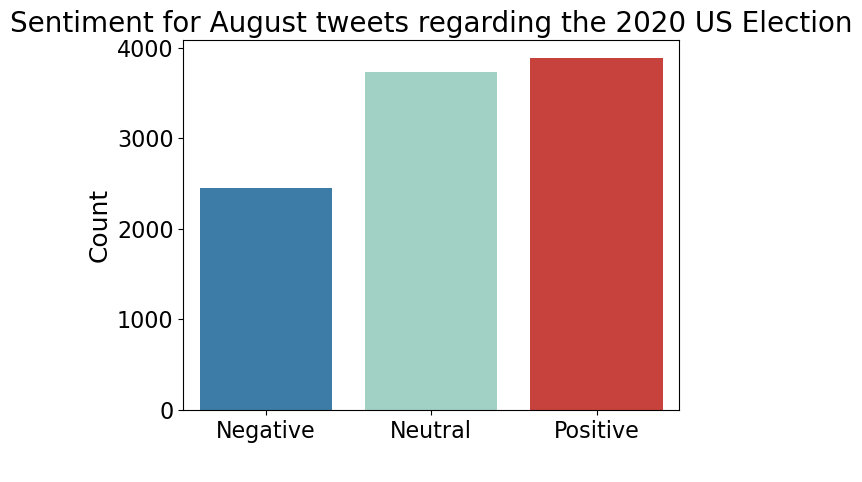

In [366]:
import seaborn as sns

colors = ["#2c7fb8",'#99d8c9', "#de2d26"]
sns.set_palette(sns.color_palette(colors))
tips = sns.load_dataset("tips")
sns.color_palette("Paired")
ax = sns.barplot(x="Analysis", y="id", data=sentiment)
ax.set_xlabel(" ",fontsize=18)
ax.set_ylabel("Count",fontsize=18)
ax.tick_params(labelsize=16)
ax.axes.set_title("Sentiment for August tweets regarding the 2020 US Election",fontsize=20)
#ax.set(xlabel='Sentiment Analysis', ylabel='Count', fontsize=20)



In [368]:
# Tweets with highest score

df_sort = df_original_clean.sort_values(by=['Polarity'], ascending = False)

df_sort = df_sort.reset_index().drop('index', axis = 1)

In [369]:
# Top 5 positive tweets from original contentent

for i in range(0,5, 1):
    print(df_sort['full_text'][i])
    print('')
    

i missed the joebiden speech because i was letting my 5 yo have the tv after his seizure i hear it was the best ever bidenharris

realdonaldtrump best president ever

us best ever president amen

wonderful impression

wishing kamalaharris the very best



In [370]:
# Top negative posts from original content
for i in range(len(df_original_clean)-1,len(df_original_clean)-6, -1):
    print(df_sort['full_text'][i])
    print('')
    
    

mamabearniki donnastowe1 ava realdonaldtrump bread buttered side time grim reaper grin and bear it

disgusting

r u nuts realdonaldtrump who cares about your bathing habits this is insane

ffs pathetic

realdonaldtrump lyintrump is a horrible person



## 2) Vader Sentiment Analysis

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

Vader Sentiment Analysis is a lexicon rule-based sentiment analysis tool that was specifically developed for social media text. Vader Sentiment accounts for speed and performance which is important for large datasets such as thousands or millions of tweets. 

Score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). 

examples of typical use cases for sentiment analysis, including proper handling of sentences with:

- typical negations (e.g., "not good")
- use of contractions as negations (e.g., "wasn't very good")
- conventional use of punctuation to signal increased sentiment intensity (e.g., "Good!!!")
- conventional use of word-shape to signal emphasis (e.g., using ALL CAPS for words/phrases)
- using degree modifiers to alter sentiment intensity (e.g., intensity boosters such as "very" and intensity dampeners such as "kind of")
- understanding many sentiment-laden slang words (e.g., 'sux')
- understanding many sentiment-laden slang words as modifiers such as 'uber' or 'friggin' or 'kinda'
- understanding many sentiment-laden emoticons such as :) and :D
- translating utf-8 encoded emojis such as 💘 and 💋 and 😁
- understanding sentiment-laden initialisms and acronyms (for example: 'lol')

    positive sentiment: compound score >= 0.05
    neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
    negative sentiment: compound score <= -0.05
    
The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

In [378]:
# Load data into dataframe

df_original_content = df[df['retweeted_status'].isna()].reset_index().drop('index', axis = 1)
df_original_content = df_original_content[df_original_content['in_reply_to_status_id'].isna()].reset_index().drop('index', axis = 1)

df_retweeted = df[df['retweeted_status'].notna()].reset_index().drop('index', axis = 1)


In [380]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/avielstern/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [381]:
df_original_content['scores'] = df_original_content['full_text'].apply(lambda review: sid.polarity_scores(review))
df_original_content['compound'] = df_original_content['scores'].apply(lambda score_dict: score_dict['compound'])
df_original_content['comp_score'] = df_original_content['compound'].apply(lambda c: 'pos' if c >=0.05 else ('neutral' if (c < 0.05 and c > -0.05) else 'neg'))

df_retweeted['scores'] = df_retweeted['full_text'].apply(lambda review: sid.polarity_scores(review))
df_retweeted['compound'] = df_retweeted['scores'].apply(lambda score_dict: score_dict['compound'])
df_retweeted['comp_score'] = df_retweeted['compound'].apply(lambda c: 'pos' if c >=0.05 else ('neutral' if (c < 0.05 and c > -0.05) else 'neg'))

In [382]:
print('Vader Sentiment Analysis')
print('')
print(df_original_content['full_text'][0])
print('')
print('compound score:', df_original_content['compound'][0])
print('sentiment:', df_original_content['comp_score'][0])


Vader Sentiment Analysis

@realDonaldTrump - I know that you’re gonna say “Fake News” “I Never said that” because you’re too dumb to realize that when you “Speak” people either “RECORD YOU” or “VIDEO YOU” but anywho, Q: did you mean what you said about writing EO’s shows weakness?

https://t.co/pZDMp6waHF

compound score: -0.705
sentiment: neg


### Clean Text and Apply Vader Sentiment Analysis

In [383]:
# Create a function to clean the tweets          
def cleanTxt(text):

        #initializing punctuations string  
    text = re.sub('RT[\s]@[A-Za-z0–9]+', '', text) # Removing RT and the the account retweeted from
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
   
    punc = '''()-[]{};:'"\, <>./?@#$%^&*_~'''
  
    # Removing punctuations in string 
    # Using loop + punctuation string 
    for ele in text:  
        if ele in punc:  
            text = text.replace(ele, " ")  
            

    
    text = re.sub(r'\s*<br\s*/?>\s*', u'\n', text)  # newline after a <br>
    text = re.sub(r'\s+', u' ', text)  # replace consecutive spaces
    text = re.sub(r'^\s+', u'', text)  # remove spaces at the beginning
    text = re.sub(r'\s+$', u'', text)  # remove spaces at the end
    

        
    return text

In [384]:
df_original_clean = df[df['retweeted_status'].isna()].reset_index().drop('index', axis = 1)
df_original_clean = df_original_clean[df_original_clean['in_reply_to_status_id'].isna()].reset_index().drop('index', axis = 1)

df_retweeted_clean = df[df['retweeted_status'].notna()].reset_index().drop('index', axis = 1)

In [385]:
# Clean Original Tweets
text = df_original_clean['full_text'].apply(cleanTxt)
df_original_clean['full_text'] = text

# Clean Retweets
text = df_retweeted_clean['full_text'].apply(cleanTxt)
df_retweeted_clean['full_text'] = text

In [386]:


df_retweeted_clean['scores'] = df_retweeted_clean['full_text'].apply(lambda review: sid.polarity_scores(review))
df_retweeted_clean['compound'] = df_retweeted_clean['scores'].apply(lambda score_dict: score_dict['compound'])
df_retweeted_clean['comp_score'] = df_retweeted_clean['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Neutral' if (c < 0.05 and c > -0.05) else 'Negative'))


In [387]:
print('Vader Sentiment Analysis')
print('')
print(df_original_clean['full_text'][0])
print('')
print('compound score:', df_original_clean['compound'][0])
print('sentiment:', df_original_clean['comp_score'][0])

Vader Sentiment Analysis

realDonaldTrump I know that you’re gonna say “Fake News” “I Never said that” because you’re too dumb to realize that when you “Speak” people either “RECORD YOU” or “VIDEO YOU” but anywho Q did you mean what you said about writing EO’s shows weakness

compound score: -0.705
sentiment: Negative


In [388]:
df_original_clean[['full_text', 'scores', 'compound', 'comp_score']].head()

,full_text,scores,compound,comp_score
0,realDonaldTrump I know that you’re gonna say “Fake News” “I Never said that” because you’re too dumb to realize that when you “Speak” people either “RECORD YOU” or “VIDEO YOU” but anywho Q did you mean what you said about writing EO’s shows weakness,"{'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.705}",-0.7050,Negative
1,Agree! But we all know that the DEMS are going to use mail in ballots to cheat!!! There will be mutiple lawsuits filed we will NEVER get out of this mess unless MAIL IN BALLOTS are defeated first! VOTER FRAUD IS REAL,"{'neg': 0.297, 'neu': 0.657, 'pos': 0.046, 'compound': -0.9297}",-0.9297,Negative
2,WHY blame the Chicoms when she can rack up a few thousand more votes from willfully ignorant Trump haters convinced he s the real culprit,"{'neg': 0.262, 'neu': 0.646, 'pos': 0.092, 'compound': -0.6124}",-0.6124,Negative
3,Top story JoeBiden Let s get to work KamalaHarris see more,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.2023}",0.2023,Positive
4,Top story JoeBiden Let s get to work KamalaHarris see more,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.2023}",0.2023,Positive


In [389]:
# Checking polarity difference for unclean and clean text for original content tweets
diff_score = df_original_clean['compound'] - df_original_content['compound']
score_diff = pd.DataFrame(diff_score)
score_diff = score_diff.sort_values(by=['compound'], ascending = False)

score_diff

,compound
5489,1.7421
5688,1.4406
5475,1.4069
4111,1.3627
8771,1.3124
...,...
2713,-1.2166
4291,-1.4080
5197,-1.5176
5553,-1.5492


In [390]:
# Identify how many tweets have changed and how many tweets have not changed after cleaning text

score_diff['group'] = 0
# Find all polarity scores that have changed signifcantly with cleaning text and have not changed significantly with cleaning text
for i in np.arange(0, len(score_diff), 1):
    if score_diff['compound'][i] > 0:

        score_diff['group'][i] = 'Changed'
        
    elif score_diff['compound'][i] < -0:

        score_diff['group'][i] = 'Changed'
        
    else:
        score_diff['group'][i] = 'No Change'

<ipython-input-390-7747b11d461c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_diff['group'][i] = 'No Change'
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-390-7747b11d461c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_diff['group'][i] = 'Changed'
<ipython-input-390-7747b11d461c>:8: Sett

In [391]:
diff = score_diff.groupby(score_diff['group']).count().reset_index()

diff


,group,compound
0,Changed,1474
1,No Change,8587


In [392]:
print(int(diff['compound'][0]/(diff['compound'][0]+diff['compound'][1])*100), 'percent of compound changed after cleaning')


14 percent of compound changed after cleaning


Text(0.5, 1.0, 'Compare compound score after cleaning data')

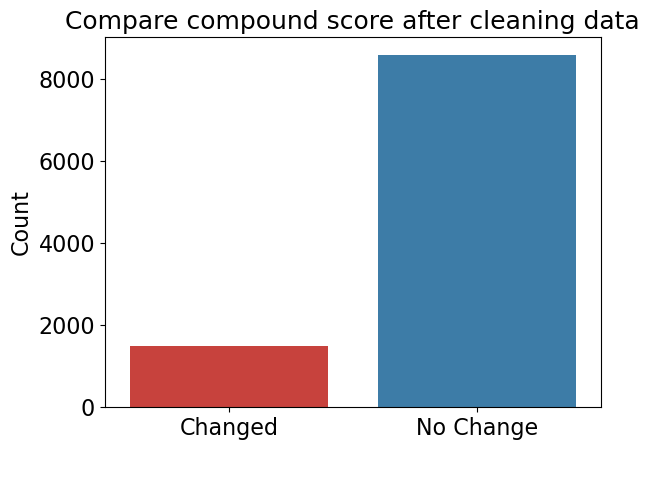

In [393]:
import seaborn as sns

colors = ["#de2d26", "#2c7fb8"]
sns.set_palette(sns.color_palette(colors))
sns.color_palette("Paired")
ax = sns.barplot(x="group", y="compound", data=diff)
ax.set_xlabel(" ",fontsize=16)
ax.set_ylabel("Count",fontsize=16)
ax.tick_params(labelsize=16)
ax.axes.set_title("Compare compound score after cleaning data",fontsize=18)

In [394]:
# Tweets with highest score

df_sort = df_original_clean.sort_values(by=['compound'], ascending = False)

df_sort = df_sort.reset_index().drop('index', axis = 1)



In [395]:
# Tweets with highest score

df_sort = df_original_clean.sort_values(by=['compound'], ascending = False)

df_sort = df_sort.reset_index().drop('index', axis = 1)


In [396]:
# Top 5 positive tweets from original contentent

for i in range(0,5, 1):
    print(df_sort['full_text'][i])
    print('')
    

KamalaHarris KAMALA HARRIS I LOVE YOU!!! I love your toughness I love your professionalism I love your no B S taking attitude I love that you can t be intimidated I love that you re not a sitting duck I love that you know how to have fun I LOVE YOUR SMILE!!

Fantastic instagram post of inspiration and words of wisdom from SarahPalinUSA to KamalaHarris non partisan super inspirational and heartfelt demonstrating when we raise women up to equal levels of power we all benefit I totally recommend reading it! Thanks Gov!

I can t begin to imagine what this man has on his shoulders How has it come to this I pray to God to give him the knowledge strength and courage he needs to see us through and I pray to God to protect our great President and keep him healthy and whole God bless America!

KamalaHarris Congratulations!! I am so elated I am a Suburban Housewife that is college educated I will be so ELATED to Cast my BALLOT for the 1st BLACK WOMAN For VP My kids and grand are Biracial Thank yo

In [397]:
# Top negative posts from original content
for i in range(len(df_sort)-1, len(df_sort)-6, -1):
    print(df_sort['full_text'][i])
    print('')
    
    

realDonaldTrump You re going to lose like the dumb and WEAK Loser you are You lost 2016 by 3m votes lost House Senate state seats and got smacked badly in 2018 Loser Loser Loser Loser

realDonaldTrump look C America its talking to U telling U its suffering B a leader nt a Trump reality TV salesmen U upset me amp my family constant mental abuse Yr lies unpredictable idiotic irrational behaviour is soul destroying abuse

realDonaldTrump I didn t think I could despise you more but then you said very fine people on both sides and my disgusted for you increased You re pathetic You re a fraud You re disgusting You re a racist Will the Lord s help you ll be in prison in 2021

realDonaldTrump has lost millions of jobs destroyed hundreds of thousands of small businesses ballooned the debt and deficit and caused the worst economic calamity in over 100 years Who the fuck is voting for this nasty jackass

Everyone agrees that this murder is horrific senseless and deplorable It s all over the news 

In [402]:
sentiment =  df_original_clean.groupby('comp_score').count().reset_index()

Text(0.5, 1.0, 'Sentiment for August tweets regarding the 2020 US Election')

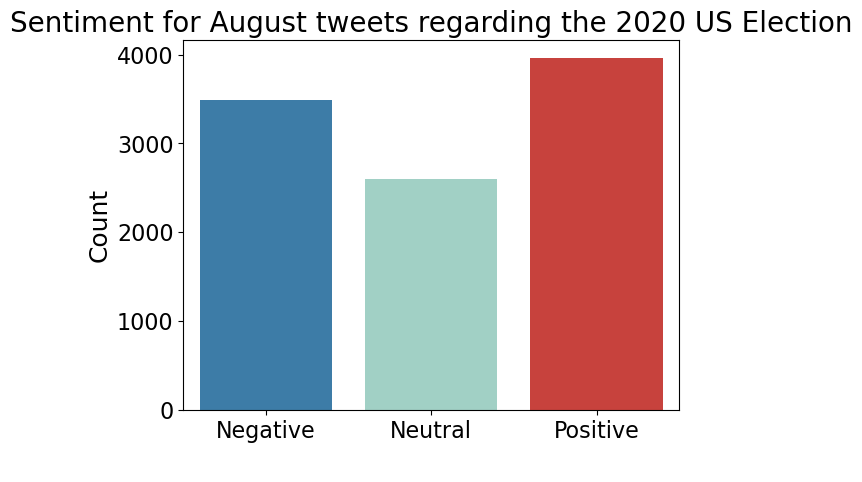

In [403]:
import seaborn as sns

colors = ["#2c7fb8",'#99d8c9', "#de2d26"]
sns.set_palette(sns.color_palette(colors))
tips = sns.load_dataset("tips")
sns.color_palette("Paired")
ax = sns.barplot(x="comp_score", y="id", data=sentiment)
ax.set_xlabel(" ",fontsize=18)
ax.set_ylabel("Count",fontsize=18)
ax.tick_params(labelsize=16)
ax.axes.set_title("Sentiment for August tweets regarding the 2020 US Election",fontsize=20)
#ax.set(xlabel='Sentiment Analysis', ylabel='Count', fontsize=20)

In [404]:
print('negative', int((sentiment['full_text'][0] / sentiment['full_text'].sum())*100), 'percent')
print('neutral', int((sentiment['full_text'][1] / sentiment['full_text'].sum())*100), 'percent')
print('positive', int((sentiment['full_text'][2] / sentiment['full_text'].sum())*100), 'percent')

negative 34 percent
neutral 25 percent
positive 39 percent


In [421]:
df_clean = df[df['in_reply_to_status_id'].isna()].reset_index().drop('index', axis = 1)
len(df_clean)

117852

In [423]:
# Clean Original Tweets
text = df_clean['full_text'].apply(cleanTxt)
df_clean['full_text'] = text

In [424]:
df_clean['scores'] = df_clean['full_text'].apply(lambda review: sid.polarity_scores(review))
df_clean['compound'] = df_clean['scores'].apply(lambda score_dict: score_dict['compound'])
df_clean['comp_score'] = df_clean['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Neutral' if (c < 0.05 and c > -0.05) else 'Negative'))

In [425]:
print('Vader Sentiment Analysis')
print('')
print(df_clean['full_text'][0])
print('')
print('compound score:', df_clean['compound'][0])
print('sentiment:', df_clean['comp_score'][0])

Vader Sentiment Analysis

This is our last stand folks And here’s your last defender If they take him down America is gone forever Vote for realDonaldTrump like your life depends on it

compound score: 0.4404
sentiment: Positive


In [497]:
biden_index = df_clean['full_text'].str.extract(r'(Biden)').dropna().index

df_biden = df_clean.iloc[biden_index]
df_biden = df_biden.reset_index().drop('index', axis = 1)

In [515]:
df_biden_sentiment = df_biden.groupby(['comp_score']).count().reset_index()

In [ ]:
df_biden.sort_values(['foll'])

Text(0.5, 1.0, 'Sentiment towards Biden August 2020')

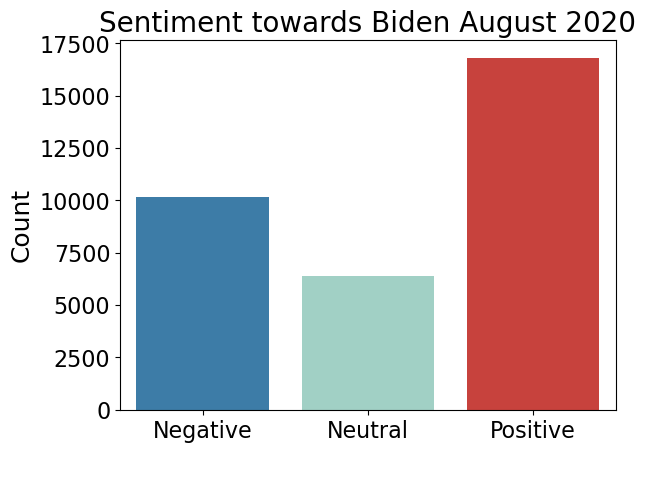

In [508]:
colors = ["#2c7fb8",'#99d8c9', "#de2d26"]
sns.set_palette(sns.color_palette(colors))
tips = sns.load_dataset("tips")
sns.color_palette("Paired")
ax = sns.barplot(x="comp_score", y="id", data=df_biden_sentiment)
ax.set_xlabel(" ",fontsize=18)
ax.set_ylabel("Count",fontsize=18)
ax.tick_params(labelsize=16)
ax.axes.set_title("Sentiment towards Biden August 2020",fontsize=20)
#ax.set(xlabel='Sentiment Analysis', ylabel='Count', fontsize=20)

In [499]:
trump_index = df_clean['full_text'].str.extract(r'(Trump)').dropna().index

df_trump = df_clean.iloc[trump_index]

df_trump = df_trump.reset_index().drop('index', axis = 1)

In [504]:
df_trump_sentiment = df_trump.groupby('comp_score').count().reset_index()

Text(0.5, 1.0, 'Sentiment towards Trump August 2020')

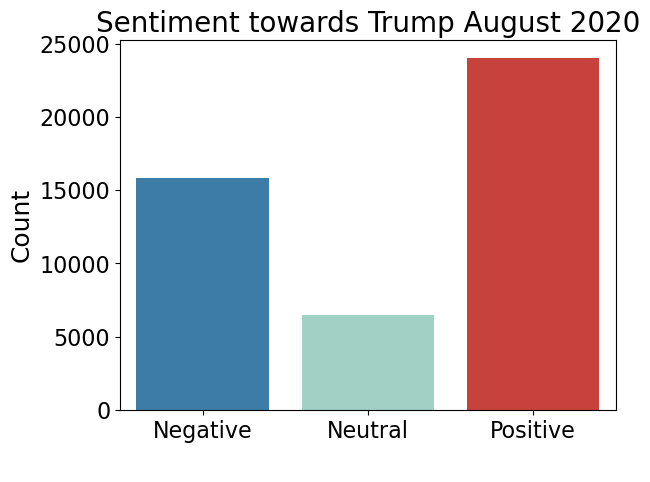

In [510]:
colors = ["#2c7fb8",'#99d8c9', "#de2d26"]
sns.set_palette(sns.color_palette(colors))
tips = sns.load_dataset("tips")
sns.color_palette("Paired")
ax = sns.barplot(x="comp_score", y="id", data=df_trump_sentiment)
ax.set_xlabel(" ",fontsize=18)
ax.set_ylabel("Count",fontsize=18)
ax.tick_params(labelsize=16)
ax.axes.set_title("Sentiment towards Trump August 2020",fontsize=20)
#ax.set(xlabel='Sentiment Analysis', ylabel='Count', fontsize=20)

## 3) Word Cloud

In [414]:
# import package
from wordcloud import WordCloud

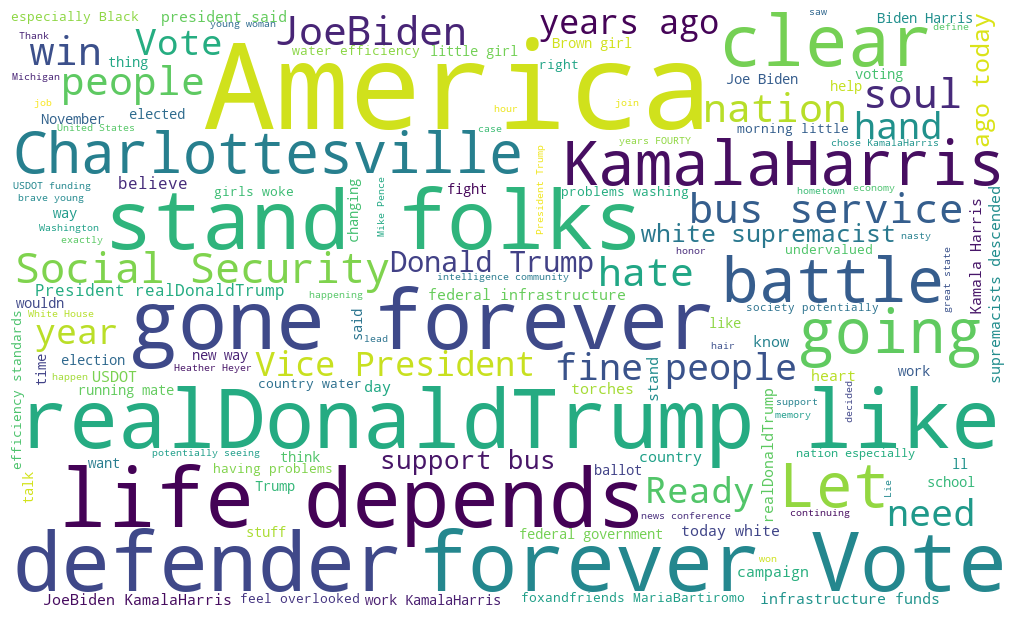

In [427]:

#remove stop words
import spacy

spacy.prefer_gpu()
spacy_nlp = spacy.load("en_core_web_sm")

# Stop words from spacy
all_stopwords = spacy_nlp.Defaults.stop_words


comment_words = '' 
  
# iterate through the csv file 
for val in text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 600, 
                background_color = 'white',
               # colormap = 'Spectral',
                stopwords = all_stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [428]:
wordcloud.words_

{'America': 1.0,
 'realDonaldTrump like': 0.839622641509434,
 'life depends': 0.8387840670859539,
 'gone forever': 0.8371069182389937,
 'stand folks': 0.8370020964360587,
 'forever Vote': 0.8370020964360587,
 'defender': 0.8334381551362684,
 'clear': 0.6008385744234801,
 'KamalaHarris': 0.5367924528301887,
 'battle': 0.5361635220125787,
 'Let': 0.5157232704402516,
 'going': 0.5107966457023061,
 'Charlottesville': 0.4889937106918239,
 'Social Security': 0.4640461215932914,
 'soul': 0.4468553459119497,
 'bus service': 0.44339622641509435,
 'win': 0.43060796645702304,
 'hate': 0.4222222222222222,
 'nation': 0.42180293501048216,
 'people': 0.420020964360587,
 'JoeBiden': 0.4139412997903564,
 'fine people': 0.4066037735849057,
 'need': 0.40356394129979034,
 'hand': 0.4027253668763103,
 'Ready': 0.38878406708595387,
 'Vote': 0.38763102725366877,
 'year': 0.359643605870021,
 'years ago': 0.35880503144654086,
 'Vice President': 0.3490566037735849,
 'Donald Trump': 0.34758909853249476,
 'suppor

In [429]:
df_clean.to_csv('2020-08_sentiment.csv')